In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Background

## Vanilla Kernel Methods

In [2]:
from kernel_solvers import predict, solve_l2_problem

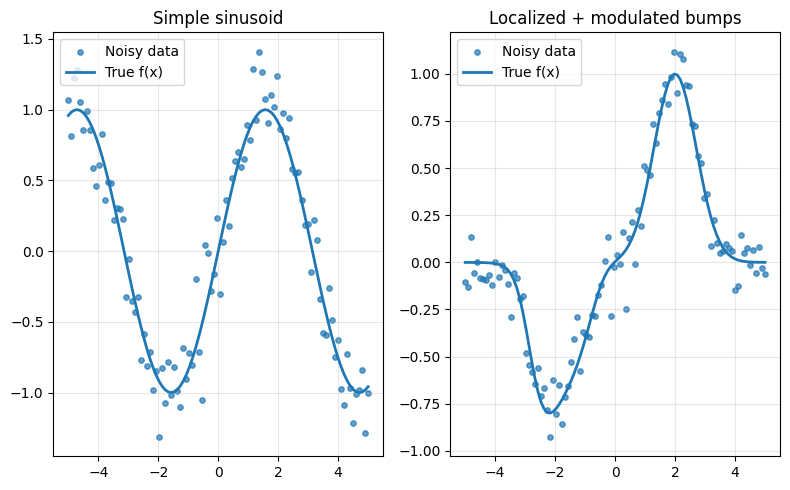

In [3]:
# Toy dataset
n = 100

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y_sin = y_sin_star + 0.2 * np.random.randn(n)

y_2_star = (
    np.exp(-(X - 2)**2)                          # bump near +2
    - 0.8 * np.exp(-(X + 2 + 0.2*np.sin(2*X))**2)  # distorted bump near -2
).ravel()

y_2 = y_2_star + 0.1 * np.random.randn(n)

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].scatter(X, y_sin, s=15, alpha=0.7, label="Noisy data")
ax[0].plot(X, y_sin_star, lw=2, label="True f(x)")
ax[0].set_title("Simple sinusoid")
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].scatter(X, y_2, s=15, alpha=0.7, label="Noisy data")
ax[1].plot(X, y_2_star, lw=2, label="True f(x)")
ax[1].set_title("Localized + modulated bumps")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()


In [4]:
alpha = solve_l2_problem(X,y_sin)
alpha_2 = solve_l2_problem(X, y_2,reg=1e-3, sigma=0.7)

y_pred1 = predict(X_test, X, alpha)
y_pred2 = predict(X_test, X, alpha_2)

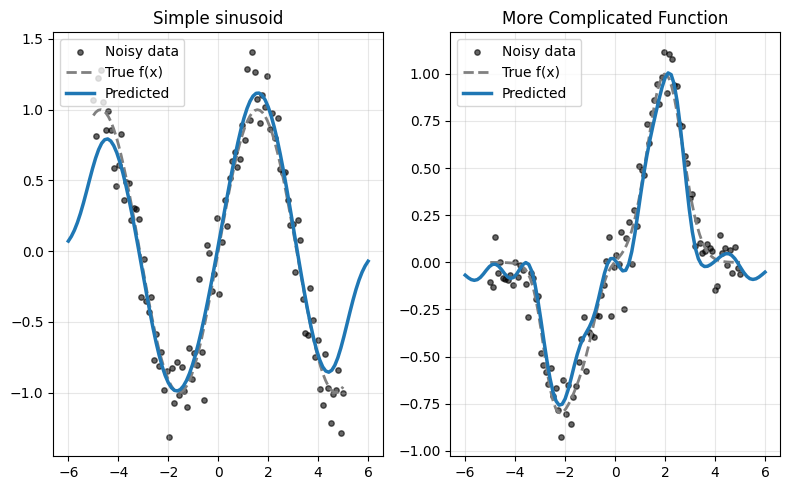

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].scatter(X, y_sin, s=15, alpha=0.6, label="Noisy data", marker="o",color="black")
ax[0].plot(X, y_sin_star, label="True f(x)", linestyle="--", color="grey", linewidth=2)
ax[0].plot(X_test,y_pred1,label="Predicted",color = "#1f77b4", linewidth=2.5)
ax[0].set_title("Simple sinusoid")
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].scatter(X, y_2, s=15, alpha=0.6, label="Noisy data", marker="o",color="black")
ax[1].plot(X, y_2_star, lw=2, label="True f(x)",linestyle="--", color="grey")
ax[1].plot(X_test,y_pred2,label="Predicted",color = "#1f77b4", linewidth=2.5)
ax[1].set_title("More Complicated Function")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("KRR_example.png", dpi=250)


## Nystrom Method

In [6]:
from kernel_solvers import solve_l2_problem_Nystrom

n = 1000

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y_sin = y_sin_star + 0.2 * np.random.randn(n)

y_2_star = (
    np.exp(-(X - 2)**2)                          # bump near +2
    - 0.8 * np.exp(-(X + 2 + 0.2*np.sin(2*X))**2)  # distorted bump near -2
).ravel()

y_2 = y_2_star + 0.1 * np.random.randn(n)


In [20]:
sigma = 1.0
reg   = 1e-2
m     = 50

alpha_sin = solve_l2_problem(X, y_sin, sigma=sigma, reg=reg)
beta_sin, idx_sin = solve_l2_problem_Nystrom(X, y_sin, m=m, sigma=sigma, reg=reg)

y_pred_sin_vanilla = predict(X_test, X, alpha_sin)
y_pred_sin_nys     = predict(X_test, X[idx_sin], beta_sin)

# --- Function 2 : bump function
alpha_2 = solve_l2_problem(X, y_2, sigma=sigma, reg=reg)
beta_2, idx_2 = solve_l2_problem_Nystrom(X, y_2, m=m, sigma=sigma, reg=reg)

y_pred_2_vanilla = predict(X_test, X, alpha_2)
y_pred_2_nys     = predict(X_test, X[idx_2], beta_2)


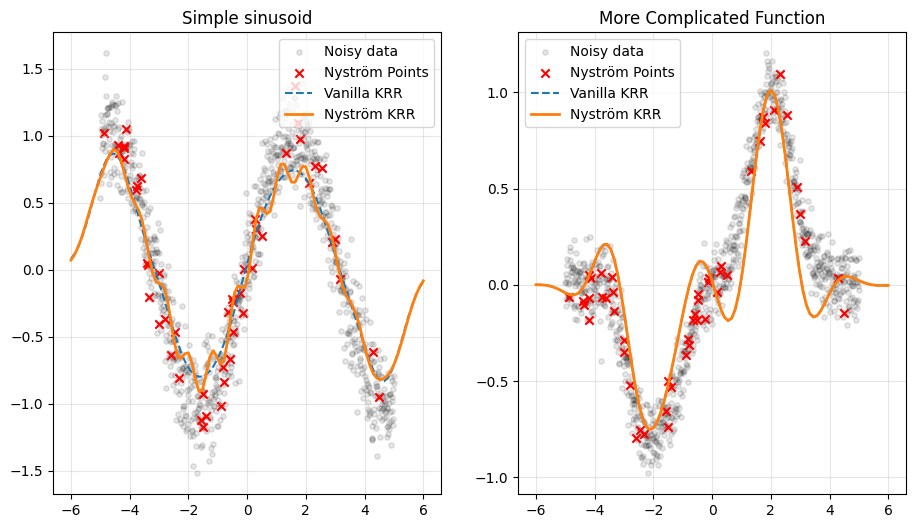

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Plot points
ax[0].scatter(X, y_sin, s=15, alpha=0.1, label="Noisy data", marker="o",color="black")
ax[0].scatter(X[idx_sin], y_sin[idx_sin], label="Nyström Points",marker="x",color="red")
ax[0].plot(X_test, y_pred_sin_vanilla, label="Vanilla KRR", linestyle="--")
ax[0].plot(X_test, y_pred_sin_nys, lw=2, label="Nyström KRR")
ax[0].set_title("Simple sinusoid")
ax[0].legend(loc="best")
ax[0].grid(alpha=0.3)

# Plot points
ax[1].scatter(X, y_2, s=15, alpha=0.1, label="Noisy data", marker="o",color="black")
ax[1].scatter(X[idx_sin], y_2[idx_sin], label="Nyström Points",marker="x",color="red")
ax[1].plot(X_test, y_pred_2_vanilla, label="Vanilla KRR", linestyle="--")
ax[1].plot(X_test, y_pred_2_nys, lw=2, label="Nyström KRR")
ax[1].set_title("More Complicated Function")
ax[1].legend(loc="best")
ax[1].grid(alpha=0.3)

plt.savefig("figures/nystrom_toy.png")

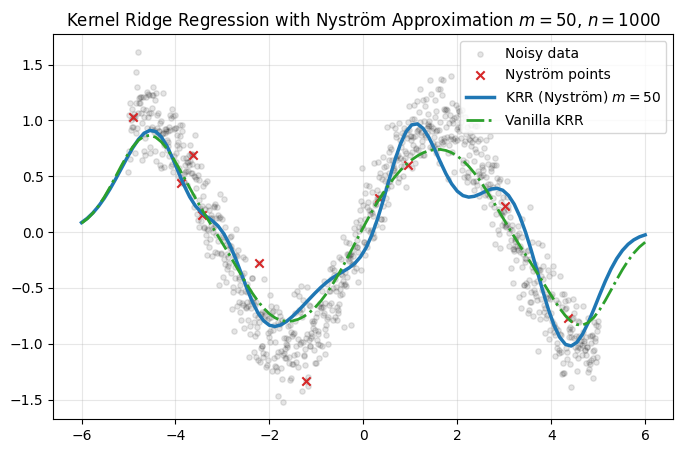

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(X, y_sin, s=15, alpha=0.1, label="Noisy data", marker="o",color="black",zorder=1)
ax.scatter(X[indices],y_sin[indices], marker="x", color="#d62728",label="Nyström points", zorder=2)
ax.plot(X_test,y_pred_nys,color ="#1f77b4", linewidth=2.5,label="KRR (Nyström) $m=50$")
ax.plot(X_test, y_pred, linestyle="-.", linewidth=2, color="#2ca02c", label="Vanilla KRR", zorder=2.8
)
ax.set_title("Kernel Ridge Regression with Nyström Approximation $m=50$, $n=1000$")
ax.legend()
ax.grid(alpha=0.3)
plt.savefig("Nystrom_toy.png",dpi=250)aa

## Nystrom Conditioning

In [111]:
n = 5

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y = y_sin_star + 0.2 * np.random.randn(n)

In [141]:
from kernel_solvers import rbf_kernel

def condition_benchmark(start=1, stop=3, num=100):
    n_s = np.logspace(start, stop, num)
    cond = []
    for n in n_s:
        m = int(np.sqrt(n))
        X = np.linspace(-5, 5, int(n)).reshape(-1, 1)
        indices = np.random.choice(int(n), size=m, replace=False)
        Xm = X[indices]
        # Kernels
        K_mm = rbf_kernel(Xm, Xm, sigma)  # (m, m)
        K_mn = rbf_kernel(Xm, X, sigma)  # (m, n)

        # Nyström system:
        A = K_mn @ K_mn.T + reg * n * K_mm  # (m, m)

        cond.append(np.linalg.cond(A))

    return cond, n_s


In [143]:
cond,n_s = condition_benchmark(stop=5, num=50)

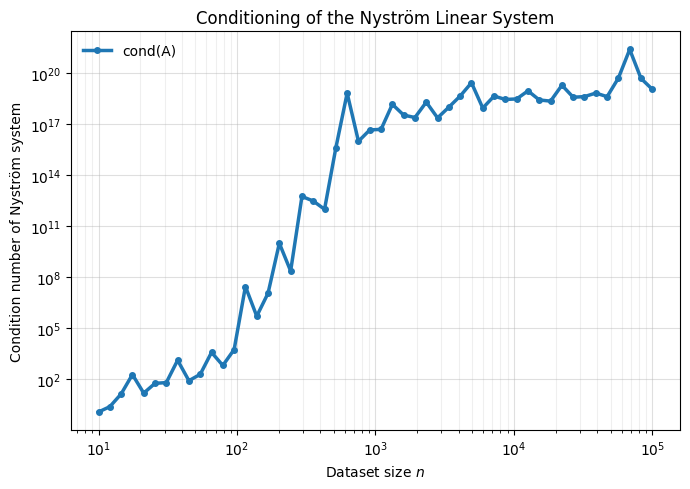

In [147]:
# --- plot ---
fig, ax = plt.subplots(figsize=(7, 5))

ax.loglog(
    n_s, cond,
    linewidth=2.5,
    color="#1f77b4",     # deep blue
    marker="o",
    markersize=4,
    label="cond(A)"
)

ax.set_xlabel(r"Dataset size $n$")
ax.set_ylabel(r"Condition number of Nyström system")
ax.set_title("Conditioning of the Nyström Linear System")

ax.grid(True, which="major", alpha=0.4)
ax.grid(True, which="minor", alpha=0.2)

ax.legend(frameon=False)

plt.tight_layout()
plt.savefig("figures/conditioning.png", dpi=250)
